#### Print your name

In [1]:
## Your code here 
print("Exercise by: Heidi Putkuri")

Exercise by: Heidi Putkuri


# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='../data/assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [2]:
import torch
from torchvision import datasets, transforms
import sys
sys.path.insert(0, '../answers')
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

In [3]:
# print labels
print(trainset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


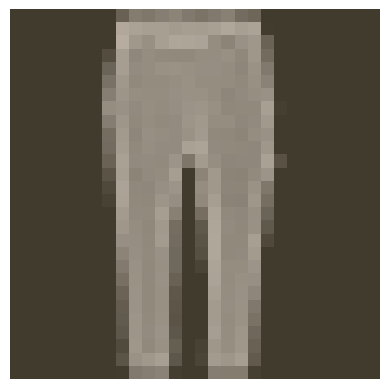

In [4]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your classifier network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.


***
### Exercise:
Build your own network based on these suggestion.

In [5]:
## Task 1:
## Your code here 
from torch import nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256) 
        self.fc2 = nn.Linear(256, 128) 
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        
        return x
model = Classifier()

In [6]:
model = Classifier()
print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


***

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.



***
### Exercise:

**Part A**: Create network (model), define loss (criterion) and define optimizer.
```python
model = 
criterion = 
optimizer = 
```

In [7]:
## Task 2:
## Your code here 
from torch import optim
model = Classifier()
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
print("Model:", model)
print("Loss:", criterion)
print("Optimizer:", optimizer)

Model: Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Loss: CrossEntropyLoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


**Part B**: Train the network with training loop.
- see "Part 3 - Training Neural Networks (Exercises).ipynb" for tips.
- Calculate 5 epochs and print "Training Loss:" after every epoch

In [9]:
training_losses = []
epochs = 5


for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad() 
        output = model(images)
        loss = criterion(output, labels) 
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        training_loss = running_loss/len(trainloader)
        print(f"Training loss: {training_loss}")
        training_losses.append(training_loss)

Training loss: 1.2796941317284285
Training loss: 0.6096841189970594
Training loss: 0.5186107364227014
Training loss: 0.47313242724963595
Training loss: 0.4445300789625406


In [10]:
print(training_losses)

[1.2796941317284285, 0.6096841189970594, 0.5186107364227014, 0.47313242724963595, 0.4445300789625406]


**Part C**: Calculate the class probabilities for network output.
- see "Part 3 - Training Neural Networks (Exercises).ipynb" for tips.

True Label (Numeric): 2
True Label (Class): Pullover
Predicted Label (Numeric): 2
Predicted Label (Class): Pullover


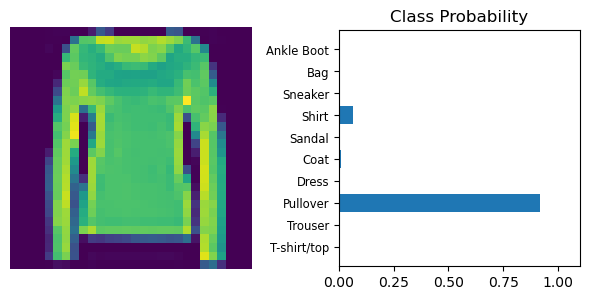

In [ ]:

class_names = trainset.classes  
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
true_label = labels[0].item() 
with torch.no_grad():
    logps = model(img) 

probabilities = torch.exp(logps) # convert to probabilities
pred_label = probabilities.argmax(dim=1).item()

print("True Label (Numeric):", true_label)
print("True Label (Class):", class_names[true_label])
print("Predicted Label (Numeric):", pred_label)
print("Predicted Label (Class):", class_names[pred_label])

helper.view_classify(img.view(1, 28, 28), probabilities, version='Fashion')

***

In [12]:
#model = Classifier()
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.01)
#training_losses = {}

#epochs = [1, 2, 3, 4, 5]

#for e in epochs:

#    print(f"Training for {e} epochs...")
#    running_loss = 0

#    for epoch in range(e):  
#        running_loss = 0
#        for images, labels in trainloader:
#            images = images.view(images.shape[0], -1) 
#            
#            optimizer.zero_grad() 
#            output = model(images)
#            loss = criterion(output, labels) 
#
#            loss.backward()
#            optimizer.step()
#            running_loss += loss.item()
#        
#        training_loss = running_loss / len(trainloader)
#        print(f"Epoch {epoch+1}/{e}, Training loss: {training_loss}")

#    training_losses[e] = training_loss





## Reflection

- Does network Training Loss decrease monotonously? And why this is important?
- Re-train network few times. Where network is unsure? How about if you train it only 1 epoch? 


The networks training loss looks like it's decreasing if using more than one epochs. Also it seems to be monotonously decreasing with each epoch. <br> It's important that the training loss decreases with each epoch, because this means that the network is learning the data and the predicted values are closer to the actual labels. If the training loss doesn't decrease, the network isn't learning anything. <br>

Sometimes it seems that the model gets the coats and dresses confused. Also some shoes are miss classified.
If the network is unsure, it is likely that the network is not learning the data well. If you train the network only 1 epoch, the network will not learn the data well and the training loss will be high.


### Check your answers by running following cell:

In [13]:
# Do not change this code!

import sys
sys.path.insert(0, '../answers/part4/')
from part4_check import *


print("Results:\n")

print("Model:", model)
print("Loss:", criterion)
print("Optimizer:", optimizer)

training_losses_check(training_losses)
probabilities_check(probabilities)


Results:

Model: Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Loss: CrossEntropyLoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

 [1.2796941317284285, 0.6096841189970594, 0.5186107364227014, 0.47313242724963595, 0.4445300789625406]
'training_losses' is ok!

 tensor([[6.7287e-03, 9.3118e-04, 9.1758e-01, 1.1541e-03, 9.3100e-03, 2.6087e-04,
         6.3646e-02, 1.0970e-08, 3.8156e-04, 4.8302e-06]])
'probabilities' is ok!


### Great work!